# Sentiment Analysis

| Key              | Value                                                                                                                                                                                                                                                                                              |
|:-----------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Course Codes** | BBT 4206, BFS 4102                                                                                                                                                                                                                                                                                 |
| **Course Names** | BBT 4206: Business Intelligence II (Week 10-12 of 13) and <br/>BFS 4102: Advanced Business Data Analytics (Week 10-12 of 13)                                                                                                                                                                       |
| **Semester**     | August to November 2025                                                                                                                                                                                                                                                                            |
| **Lecturer**     | Allan Omondi                                                                                                                                                                                                                                                                                       |
| **Contact**      | aomondi@strathmore.edu                                                                                                                                                                                                                                                                             |
| **Note**         | The lecture contains both theory and practice.<br/>This notebook forms part of the practice.<br/>It is intended for educational purpose only.<br/>Recommended citation: [BibTex](https://raw.githubusercontent.com/course-files/NaturalLanguageProcessing/refs/heads/main/RecommendedCitation.bib) |


**Business context**: A business has set a strategic objective *to increase the monthly average customer rating to 3.8/5 by the end of the current financial year*. The business tracks two Key Performance Indicators (KPIs) from the customer perspective:

1. **Lagging KPI**: Monthly average customer rating
2. **Leading KPI**: The number of positive, neutral, and negative reviews received per theme/topic

The business wants to leverage Natural Language Processing (NLP) as part of AI to create a predictive model that can predict a customer's sentiment based on their textual comments. The model needs to be trained on historical customer reviews and ratings to identify patterns and trends in customer sentiment. This will help the business to consider the qualitative aspects of customer feedback, not just the quantitative ratings, despite the large number of customers.

**Dataset:** The original dataset by **Ott and Arvidsson (2023)** consists of 878,561 reviews (1.3GB) from 4,333 hotels crawled from **TripAdvisor ([https://www.tripadvisor.com/](https://www.tripadvisor.com/))**.
Points to note:
- Some reviews are written in French. Source: [https://www.cs.cmu.edu/~jiweil/html/hotel-review.html](https://www.cs.cmu.edu/~jiweil/html/hotel-review.html) or [https://www.kaggle.com/datasets/joebeachcapital/hotel-reviews](https://www.kaggle.com/datasets/joebeachcapital/hotel-reviews).
- We use a scaled-down version of the dataset (a sample) that contains 50,000 reviews for the sake of performance and efficiency in a lab setting for educational purposes.

| Feature            | Description                                                                           |
|--------------------|---------------------------------------------------------------------------------------|
| `date`             | Indicates the date when the review was written                                        |
| `offering_id`      | Indicates the ID of the hotel that the customer stayed in                             |
| `date_stayed`      | Indicates the date when the customer stayed at the hotel                              |
| `text`             | Contains the review text                                                              |
| `rating_overall`   | Overall rating given by the customer (1 to 5 stars; 1 is the worst and 5 is the best) |
| `is_english`       | Indicates whether the review is written in English (`True`) or not (`False`)          |
| `author_username`  | Indicates the username of the customer who wrote the review                           |
| `author_location`  | Indicates the location of the customer who wrote the review                           |

## Step 1: Import the necessary libraries

**Purpose**: This chunk imports all the necessary libraries for data analysis, machine learning, and visualization.

1. **For file and system operations [urllib3](https://urllib3.readthedocs.io/en/stable/) and [joblib](https://joblib.readthedocs.io/en/stable/)**
    - `urllib.request` is used for opening and downloading data from URLs.
    - `os` provides functions for interacting with the operating system, such as file and directory management.
    - `joblib` and `picle` are used for saving and loading Python objects, such as machine learning models, to and from disk.

2. **For data manipulation - [pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html) and [numpy](https://numpy.org/doc/stable/index.html):**
    - `pandas as pd`: For loading the dataset, creating and managing DataFrames, data manipulation and analysis using DataFrames
    - `numpy as np`: For numerical operations and array manipulations

3. **For text preprocessing - [re](https://docs.python.org/3/library/re.html)**
    - `re`: For regular expression operations to clean and preprocess text data
    - `ast`: For converting strings to Python objects.

4. **For sentiment analysis - [nltk](https://www.nltk.org/book/) and [scikit-learn](https://scikit-learn.org/)**
    - `nltk` is a Python package for natural language processing. It provides a variety of tools for analyzing textual data, including tokenization, part-of-speech tagging, named entity recognition, sentiment analysis, and more.
    - `stopwords` is a list of stopwords in the English language. It is used to remove stopwords from textual data before processing.
    - `PorterStemmer` is a stemming algorithm that reduces words to their root form.

    - `TfidfVectorizer` is a vectorizer that converts text documents to vectors of TF-IDF features.
    - `make_pipeline` is a function that creates a pipeline of preprocessing and model training steps.
    - `LogisticRegression` is a classification algorithm that uses logistic regression to predict binary labels.
    - `accuracy_score` is a function that calculates the accuracy of a model's predictions.
    - `confusion_matrix` is a function that creates a confusion matrix for a classification model.
    - `classification_report` is a function that creates a classification report for a classification model.
    - `train_test_split` is a function that splits data into training and test sets.
    - `MultinomialNB` is a classification algorithm that uses the multinomial naive Bayes algorithm to predict binary labels.
    - `DecisionTreeClassifier` is a classification algorithm that uses decision trees to predict binary labels.
    - `RandomForestClassifier` is a classification algorithm that uses random forests to predict binary labels.
    - `precision_recall_fscore_support` is a function that calculates precision, recall, F1 score, and support for a classification model.

5. **For data visualization - [matplotlib](https://matplotlib.org/stable/gallery/index.html) and [seaborn](https://seaborn.pydata.org/)**
    - `matplotlib.pyplot as plt`: For basic plotting functionality
    - `seaborn as sns`: For advanced plotting functionality
    - `WordCloud` is a word cloud visualization tool that generates word clouds from text data.

6. **For formatting of display text**
    - `textwrap` is used to format and wrap text for improved readability in output.

7. **For mathematical operations**
    - `math` supplies mathematical functions like ceiling, floor, and trigonometric operations.

In [1]:
# For file and system operations
import urllib.request
import os
import joblib
import pickle

# For data manipulation
import pandas as pd
import numpy as np

# For text preprocessing
import re
import ast

# For sentiment analysis
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
# nltk.download('all')  # Downloads all NLTK data (large download) approx. 3.5GB !
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate

# For data visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from wordcloud import WordCloud
import textwrap

# Set visual styles for the whole notebook
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
%matplotlib inline

# For suppressing warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


## Step 2: Load the data

In [2]:
dataset_path = './data/processed_scaled_down_reviews_with_topics.csv'
url = 'https://github.com/course-files/SentimentAnalysis/raw/refs/heads/main/data/processed_scaled_down_reviews_with_topics.csv'

if not os.path.exists(dataset_path):
    print("Downloading dataset...")
    if not os.path.exists('./data'):
        os.makedirs('./data')
    urllib.request.urlretrieve(url, dataset_path)
    print("✅ Dataset downloaded")
else:
    print("✅ Dataset already exists locally")

customer_reviews_data = pd.read_csv(dataset_path, encoding='utf-8')
print(f"\nLoaded: {len(customer_reviews_data)} reviews")
print("Sample review:")
print(customer_reviews_data['text'].iloc[0][:100] + "...")

✅ Dataset already exists locally

Loaded: 44007 reviews
Sample review:
Being from a small town in Tennessee, I was very unsure of what to expect from the large city hotel....


- The **ratings** column contains values that look like dictionaries, but they are actually stored as strings (e.g., "{'service': 5.0, 'cleanliness': 5.0, ...}"). This means that Python sees them as text, not as actual dictionaries.
- The code therefore uses `ast.literal_eval` to safely convert each string in the **ratings** column into an actual Python dictionary. The result is stored in a new column called ratings_dict.

In [3]:
print("List of all features (columns) before splitting the ratings:")
print(customer_reviews_data.columns.tolist())

# Convert 'ratings' from a String to a Python dictionary
customer_reviews_data['ratings_dict'] = customer_reviews_data['ratings'].apply(ast.literal_eval)

# Expand the Python dictionary into separate columns
ratings_df = customer_reviews_data['ratings_dict'].apply(pd.Series)
customer_reviews_data = pd.concat([customer_reviews_data, ratings_df], axis=1)

print("List of all features (columns) after splitting the ratings:")
print(customer_reviews_data.columns.tolist())

List of all features (columns) before splitting the ratings:
['date', 'offering_id', 'date_stayed', 'ratings', 'rating_overall', 'text', 'clean_text', 'topic_label', 'topic_probability']
List of all features (columns) after splitting the ratings:
['date', 'offering_id', 'date_stayed', 'ratings', 'rating_overall', 'text', 'clean_text', 'topic_label', 'topic_probability', 'ratings_dict', 'service', 'cleanliness', 'overall', 'value', 'location', 'sleep_quality', 'rooms', 'check_in_front_desk', 'business_service_(e_g_internet_access)']


In [4]:
# Preview data
print("\nFirst 5 reviews:")
display(customer_reviews_data.head())

print("\nLast 5 reviews:")
display(customer_reviews_data.tail())


First 5 reviews:


,date,offering_id,date_stayed,ratings,rating_overall,text,clean_text,topic_label,topic_probability,ratings_dict,service,cleanliness,overall,value,location,sleep_quality,rooms,check_in_front_desk,business_service_(e_g_internet_access)
0,2010-10-25,111492,October 2010,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",5.0,"Being from a small town in Tennessee, I was ve...",being from a small town in tennessee i was ver...,Exceptional Guest Experience and Service Quality,0.781774,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",5.0,5.0,5.0,4.0,5.0,5.0,4.0,NaN,NaN
1,2009-10-14,108562,October 2009,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",4.0,I stayed at this courtyard for 2 nights . Ever...,i stayed at this courtyard for nights everythi...,"Great Location, Cleanliness, and Friendly Staff",0.522267,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",5.0,5.0,4.0,5.0,5.0,NaN,5.0,NaN,NaN
2,2007-10-20,94354,September 2007,"{'service': 2.0, 'cleanliness': 3.0, 'overall'...",3.0,Even in Boston for $180 plus taxes per night y...,even in boston for plus taxes per night you mi...,"Great Location, Cleanliness, and Friendly Staff",0.547691,"{'service': 2.0, 'cleanliness': 3.0, 'overall'...",2.0,3.0,3.0,3.0,5.0,NaN,2.0,2.0,NaN
3,2012-02-09,98798,February 2012,"{'service': 2.0, 'cleanliness': 2.0, 'overall'...",2.0,This hotel is a great old building (formerly t...,this hotel is a great old building formerly th...,Exceptional Guest Experience and Service Quality,0.614808,"{'service': 2.0, 'cleanliness': 2.0, 'overall'...",2.0,2.0,2.0,2.0,5.0,2.0,2.0,NaN,NaN
4,2010-07-06,93889,July 2010,"{'service': 2.0, 'cleanliness': 2.0, 'overall'...",2.0,"The Good~room was larger than expected, free i...",the goodroom was larger than expected free int...,Negative Service Experiences and Front Desk Is...,0.867284,"{'service': 2.0, 'cleanliness': 2.0, 'overall'...",2.0,2.0,2.0,4.0,3.0,2.0,2.0,NaN,NaN



Last 5 reviews:


,date,offering_id,date_stayed,ratings,rating_overall,text,clean_text,topic_label,topic_probability,ratings_dict,service,cleanliness,overall,value,location,sleep_quality,rooms,check_in_front_desk,business_service_(e_g_internet_access)
44002,2010-05-06,93562,May 2009,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",5.0,My wife and I stayed at the Affinia Manhattan ...,my wife and i stayed at the affinia manhattan ...,"Great Location, Cleanliness, and Friendly Staff",0.455352,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",4.0,5.0,5.0,4.0,5.0,4.0,4.0,NaN,NaN
44003,2012-02-22,2079052,February 2012,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",5.0,We have just arrived back to Ireland from a fo...,we have just arrived back to ireland from a fo...,"Great Location, Cleanliness, and Friendly Staff",0.725909,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
44004,2010-10-17,81394,September 2010,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",5.0,We visited San Francisco for our honeymoon and...,we visited san francisco for our honeymoon and...,Exceptional Guest Experience and Service Quality,0.320640,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",5.0,5.0,5.0,4.0,5.0,5.0,5.0,NaN,NaN
44005,2010-10-08,93457,April 2010,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",5.0,"This was a perfect location, the room had 2 qu...",this was a perfect location the room had queen...,"Great Location, Cleanliness, and Friendly Staff",0.926238,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
44006,2010-03-15,266157,March 2010,"{'service': 2.0, 'cleanliness': 5.0, 'overall'...",3.0,Our room rate was 129 but after it was all sai...,our room rate was but after it was all said an...,Value for Money and Convenient City Location,0.476193,"{'service': 2.0, 'cleanliness': 5.0, 'overall'...",2.0,5.0,3.0,1.0,5.0,5.0,5.0,NaN,NaN


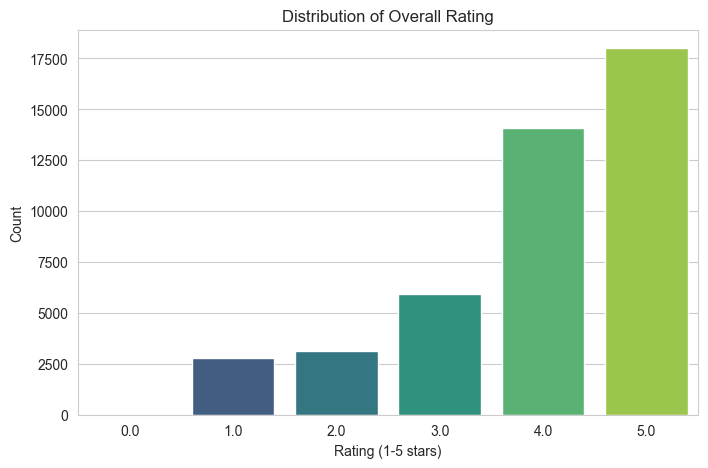

In [5]:
# Now plot the overall rating
plt.figure(figsize=(8,5))
sns.countplot(x='overall', data=customer_reviews_data, palette='viridis')
plt.title('Distribution of Overall Rating')
plt.xlabel('Rating (1-5 stars)')
plt.ylabel('Count')
plt.show()

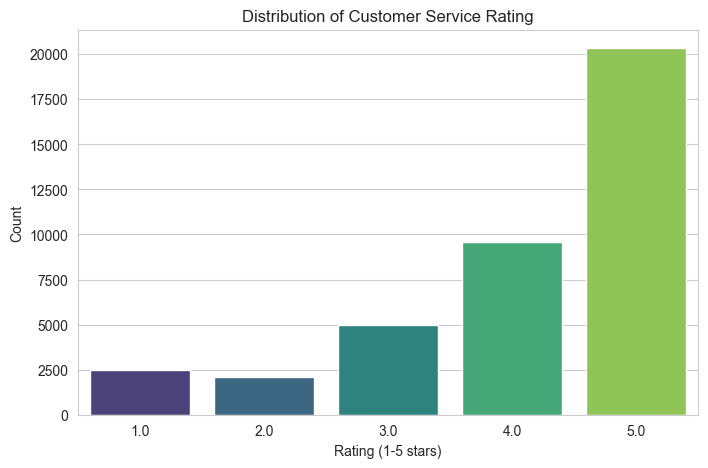

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x='service', data=customer_reviews_data, palette='viridis')
plt.title('Distribution of Customer Service Rating')
plt.xlabel('Rating (1-5 stars)')
plt.ylabel('Count')
plt.show()

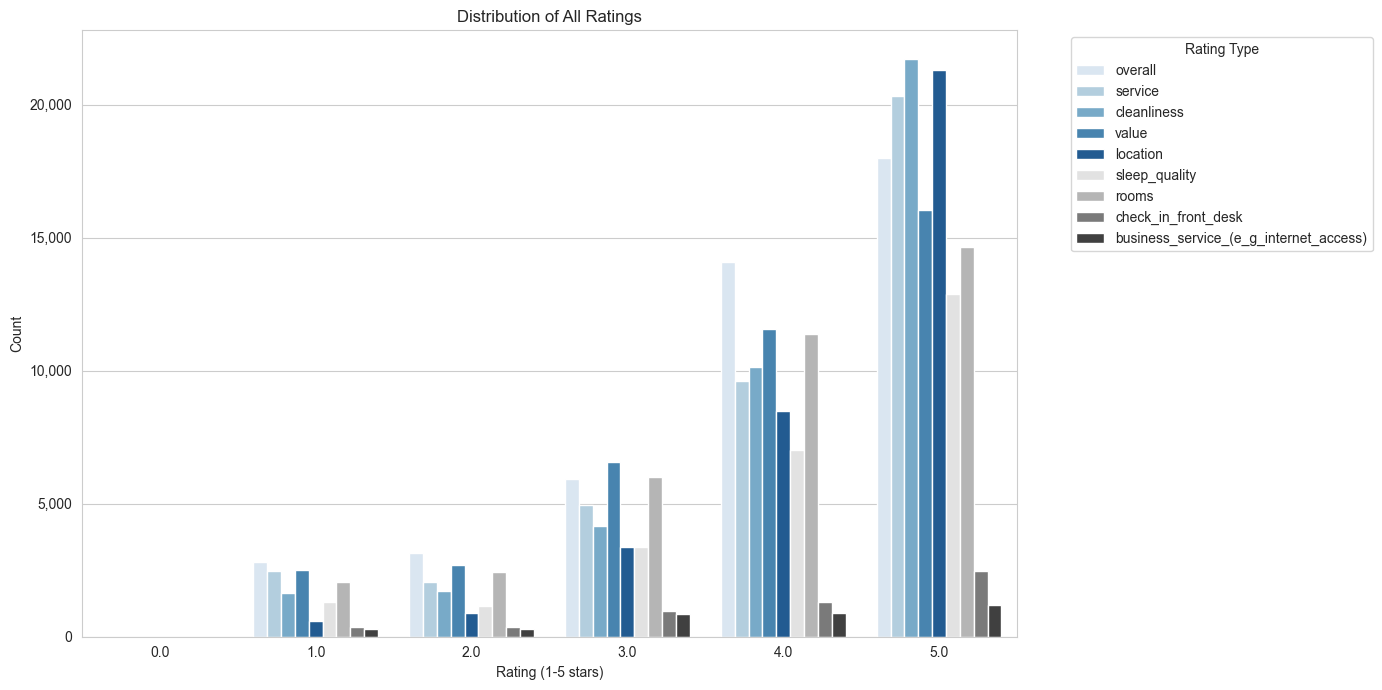

In [7]:
# Updated list of all rating columns
rating_cols = [
    'service', 'cleanliness', 'overall', 'value', 'location',
    'sleep_quality', 'rooms', 'check_in_front_desk', 'business_service_(e_g_internet_access)'
]

n = len(rating_cols)
blues = sns.color_palette("Blues", n_colors=n//2 + n%2)
greys = sns.color_palette("Greys", n_colors=n//2)
custom_palette = blues + greys

# The melt function in pandas transforms your DataFrame from wide format (many
# columns for each rating type) to long format (one column for rating type, one
# for value). This is useful for plotting or analysis where you want all
# ratings in a single column.
ratings_long = customer_reviews_data.melt(
    value_vars=rating_cols, var_name='Rating_Type', value_name='Rating'
)

plt.figure(figsize=(14, 7))
ax = sns.countplot(x='Rating', hue='Rating_Type', data=ratings_long, palette=custom_palette)

plt.title('Distribution of All Ratings')
plt.xlabel('Rating (1-5 stars)')
plt.ylabel('Count')

# Add count labels on top of each bar
# for container in ax.containers:
#     ax.bar_label(container, fmt='%d', label_type='edge')

# Format y-axis with commas
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.legend(title='Rating Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Step 3: Data Preprocessing
#### Sentiment Label Creation

In [8]:
# Convert ratings to sentiment categories
def rating_to_sentiment(rating):
    if rating <= 2: return 'negative'
    elif rating == 3: return 'neutral'
    else: return 'positive'

customer_reviews_data['sentiment'] = customer_reviews_data['service'].apply(rating_to_sentiment)

# Check sentiment distribution
sentiment_counts = customer_reviews_data['service'].value_counts()
print("\nSentiment distribution:")
print(sentiment_counts)


Sentiment distribution:
service
5.0    20340
4.0     9605
3.0     4953
1.0     2457
2.0     2067
Name: count, dtype: int64


### 3.2. Text Cleaning

Processing includes:
- Lowercasing
- Removing special characters/numbers
- Stopword removal (e.g., "the", "and")
- Porter stemming (e.g., "loved" → "love")

In [9]:
# Initialize NLP tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    # Lowercase conversion
    text = text.lower()

    # Remove special characters/numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize and remove stopwords
    tokens = nltk.word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]

    # Apply stemming
    stemmed = [stemmer.stem(word) for word in filtered]

    return " ".join(stemmed)

# Apply cleaning
customer_reviews_data['clean_text_for_sa'] = customer_reviews_data['clean_text'].apply(clean_text)

# Show a transformation example
print("\nOriginal review:", customer_reviews_data['clean_text'][0])
print("\n\nCleaned review:", customer_reviews_data['clean_text_for_sa'][0])


Original review: being from a small town in tennessee i was very unsure of what to expect from the large city hotel i was very surprised by the down home feel my wife and i received from the staff at the hotel from checkin to checkout we were met by the doorman who graciously took care of our car and helped us check into our room the young man at the desk did a great job of advising us on which tours to take and a great italian restaurant in the west loop neighborhood since we dont travel to large cities often we really appreciated the friendly atmosphere of the staffthey always made us feel welcome and answered our questions easily and friendly i would recommend this hotel to anyone wanting a pleasant experience free from the hustle and bustle of big city life well located and within walking distance of everything thanks to all for a wonderful weekendwe plan on returning


Cleaned review: small town tennesse unsur expect larg citi hotel surpris home feel wife receiv staff hotel check

## Step 4: Feature Engineering

Convert text to numerical features using TF-IDF

Why TF-IDF?
- Weights words based on its importance in the document versus its importance in the corpus
- Better than raw counts (using `CountVectorizer`) for sentiment analysis

In [10]:
# Initialize TF-IDF Vectorizer
# Including trigrams (ngram_range=(1,3)) allows the model to capture more
# context and specific phrases, which can improve sentiment analysis,
# especially for phrases like "not at all good". However, it increases feature
# space and may add noise if your dataset is small.
tfidf = TfidfVectorizer(
    max_features=5000,  # Limit vocabulary size
    ngram_range=(1,3)   # Include unigrams, bigrams, and trigrams
)

# Create feature matrix
X = tfidf.fit_transform(customer_reviews_data['clean_text_for_sa'])
y = customer_reviews_data['sentiment']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

Training samples: 35205
Test samples: 8802


In [11]:
# For X_train
X_train_df = pd.DataFrame(X_train[:5].toarray(), columns=tfidf.get_feature_names_out())
display(X_train_df)

# For X_test
X_test_df = pd.DataFrame(X_test[:5].toarray(), columns=tfidf.get_feature_names_out())
display(X_test_df)

,aaa,abl,abl check,abl get,abl walk,absolut,absolut love,ac,ac unit,ac work,...,younger,your,your go,your look,youv,yr,yr old,yummi,zero,zoo
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.165898,0.259488,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,aaa,abl,abl check,abl get,abl walk,absolut,absolut love,ac,ac unit,ac work,...,younger,your,your go,your look,youv,yr,yr old,yummi,zero,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 5: Model Training

- The purpose of training a model is to create a system that can automatically predict sentiment (positive, neutral, or negative) from raw customer feedback text. Specific benefits include:

1. **Automate Sentiment Analysis**
    - Replace manual review reading with AI-powered classification
    - Example: Automatically tag 10,000+ reviews as positive/neutral/negative

2. **Learn Language Patterns**
    - The model learns which words/phrases correlate with each sentiment:
      - Positive: "great", "excellent service", "friendly staff"
      - Negative: "terrible", "broken", "rude"
      - Neutral: "average", "acceptable", "standard"

3. **Generalize to New Reviews**
    - Once trained, it can predict sentiment for never-before-seen reviews
    - Example:
    ```
    predict_sentiment("The concierge was amazingly helpful!")
    # Output: ('positive', 0.92) → 92% confidence
    ```
---
- Real-World Applications
1. **Customer Experience Monitoring**
    - Track sentiment trends over time
    - Example: "Negative reviews increased 20% this month"

2. **Automatic Alerting**
    - Flag negative reviews for immediate follow-up

3. **Product Improvement**
    - Identify frequent issues in negative reviews
    - Example: "57% of negative reviews mention 'broken AC'"

---
**Why Not Use Rules Instead?**
- A rules-based approach (e.g., "if 'great' in text → positive") fails because:
    - Context matters: "not great" is negative. This is why we use bigrams and trigrams.
    - New phrases emerge: "game-changing UX" (positive) will not be in predefined rules.
    - Scalability: It is challenging to manually maintain rules for 10,000+ unique phrases.

- The ML model automatically learns these nuances from data.
---
**Sentiment Analysis Model Training Pipeline**
- Input: Cleaned text → TF-IDF features
- Learning: Adjusts weights for each word's sentiment contribution
- Output: Prediction function f(text) → sentiment
- Validation: Tests on held-out reviews to verify accuracy

In [12]:
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=53),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=53),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=53, n_jobs=1)
    # "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=53)
}

### Model Training using 10-Fold Cross Validation with 3 Repeats

In [13]:
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=53)
cv_results = {}

for name, model in models.items():
    print(f"Cross-validating {name}...")
    scores = cross_validate(
        model, X, y,
        cv=cv,
        scoring=scoring,
        n_jobs=1,
        return_train_score=False
    )
    # 30 folds: 10 splits x 3 repeats
    results_df = pd.DataFrame({
        'Fold': range(1, len(scores['test_accuracy']) + 1),
        'Accuracy': scores['test_accuracy'],
        'Precision': scores['test_precision_weighted'],
        'Recall': scores['test_recall_weighted'],
        'F1-Score': scores['test_f1_weighted']
    })
    print(f"\n{name} - Raw Cross-Validation Metrics:")
    display(results_df)
    cv_results[name] = results_df

Cross-validating Logistic Regression...

Logistic Regression - Raw Cross-Validation Metrics:


,Fold,Accuracy,Precision,Recall,F1-Score
0,1,0.820950,0.785528,0.820950,0.791203
1,2,0.820268,0.775974,0.820268,0.788483
2,3,0.831856,0.798527,0.831856,0.804580
3,4,0.824585,0.783888,0.824585,0.794778
4,5,0.819586,0.776963,0.819586,0.789528
5,6,0.821631,0.776435,0.821631,0.786333
6,7,0.815951,0.774253,0.815951,0.785214
7,8,0.820909,0.779545,0.820909,0.789201
8,9,0.826136,0.790207,0.826136,0.795694
9,10,0.819545,0.775672,0.819545,0.785925


Cross-validating Naive Bayes...

Naive Bayes - Raw Cross-Validation Metrics:


,Fold,Accuracy,Precision,Recall,F1-Score
0,1,0.819132,0.771112,0.819132,0.771403
1,2,0.823449,0.793393,0.823449,0.776671
2,3,0.827085,0.779098,0.827085,0.779329
3,4,0.818905,0.756703,0.818905,0.770724
4,5,0.823449,0.781109,0.823449,0.777012
5,6,0.817314,0.769715,0.817314,0.768955
6,7,0.817087,0.756144,0.817087,0.770151
7,8,0.812500,0.754742,0.812500,0.762942
8,9,0.813636,0.725463,0.813636,0.763489
9,10,0.815455,0.756968,0.815455,0.768227


Cross-validating Decision Tree...

Decision Tree - Raw Cross-Validation Metrics:


,Fold,Accuracy,Precision,Recall,F1-Score
0,1,0.794138,0.724651,0.794138,0.728876
1,2,0.793229,0.704119,0.793229,0.725367
2,3,0.796864,0.730056,0.796864,0.732480
3,4,0.799364,0.695904,0.799364,0.736374
4,5,0.798000,0.694695,0.798000,0.731401
5,6,0.799137,0.808068,0.799137,0.735815
6,7,0.795047,0.704611,0.795047,0.728169
7,8,0.790682,0.705654,0.790682,0.730336
8,9,0.790682,0.742118,0.790682,0.730726
9,10,0.794091,0.742523,0.794091,0.725723


Cross-validating Random Forest...

Random Forest - Raw Cross-Validation Metrics:


,Fold,Accuracy,Precision,Recall,F1-Score
0,1,0.784594,0.615588,0.784594,0.689892
1,2,0.784594,0.615588,0.784594,0.689892
2,3,0.784594,0.615588,0.784594,0.689892
3,4,0.784594,0.615588,0.784594,0.689892
4,5,0.784594,0.615588,0.784594,0.689892
5,6,0.784594,0.615588,0.784594,0.689892
6,7,0.784594,0.615588,0.784594,0.689892
7,8,0.784773,0.615868,0.784773,0.690136
8,9,0.784773,0.615868,0.784773,0.690136
9,10,0.784773,0.615868,0.784773,0.690136


In [14]:
summary = []
for name, df in cv_results.items():
    summary.append({
        'Model': name,
        'Accuracy Mean': df['Accuracy'].mean(),
        'Accuracy Std': df['Accuracy'].std(),
        'Precision Mean': df['Precision'].mean(),
        'Precision Std': df['Precision'].std(),
        'Recall Mean': df['Recall'].mean(),
        'Recall Std': df['Recall'].std(),
        'F1-Score Mean': df['F1-Score'].mean(),
        'F1-Score Std': df['F1-Score'].std()
    })

results_df = pd.DataFrame(summary).sort_values('F1-Score Mean', ascending=False)
display(results_df)

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1-Score Mean,F1-Score Std
0,Logistic Regression,0.822202,0.003586,0.781978,0.006626,0.822202,0.003586,0.791326,0.004815
1,Naive Bayes,0.818779,0.003723,0.764141,0.015732,0.818779,0.003723,0.770859,0.004125
2,Decision Tree,0.795896,0.002655,0.713883,0.031818,0.795896,0.002655,0.731017,0.003844
3,Random Forest,0.784648,0.000083,0.615672,0.000130,0.784648,0.000083,0.689965,0.000114


### Model Comparison Visualization

<Figure size 1200x600 with 0 Axes>

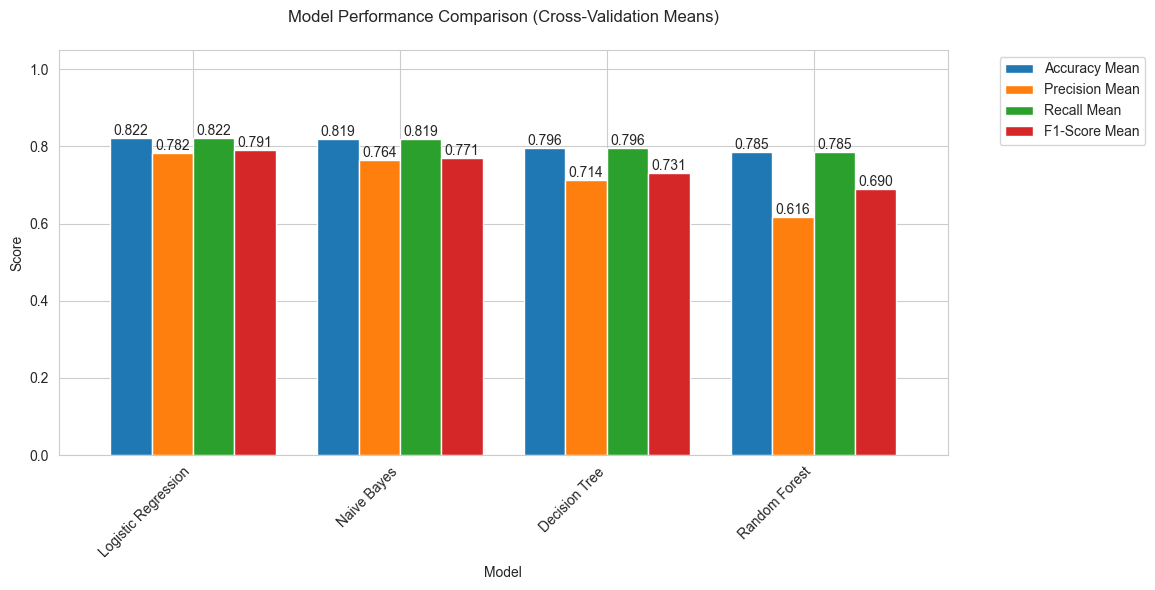

In [15]:
import matplotlib.pyplot as plt

# Plot mean metric comparison from cross-validation
metrics_to_plot = ['Accuracy Mean', 'Precision Mean', 'Recall Mean', 'F1-Score Mean']
plt.figure(figsize=(12, 6))
ax = results_df.set_index('Model')[metrics_to_plot].plot(kind='bar', width=0.8)
plt.title('Model Performance Comparison (Cross-Validation Means)', pad=20)
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=10)

plt.show()

### "Best" Model Selection (Based on the F1-Score)


 The Best Performing Model: Logistic Regression
 F1-Score (CV Mean): 0.791

 Classification Report:
              precision    recall  f1-score   support

    negative       0.67      0.54      0.60       945
     neutral       0.37      0.13      0.19       942
    positive       0.86      0.96      0.90      6915

    accuracy                           0.82      8802
   macro avg       0.63      0.54      0.56      8802
weighted avg       0.78      0.82      0.79      8802



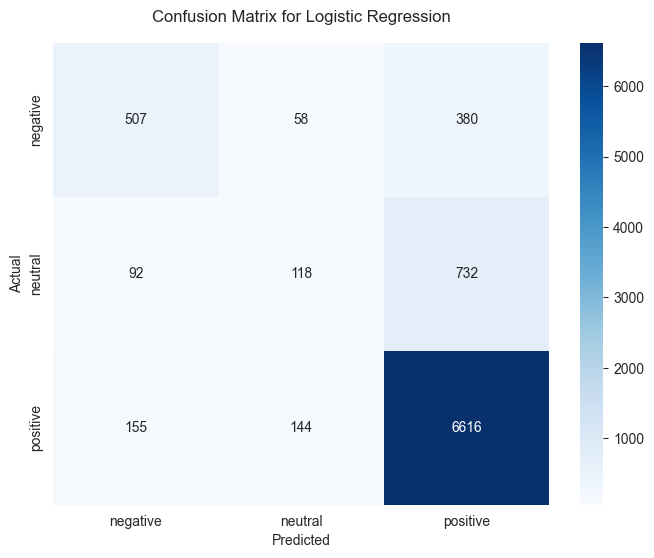

In [16]:
# Select the best model type based on the F1-Score
best_model_name = results_df.iloc[0]['Model']
best_model_type = models[best_model_name]

# Retrain the best model on training data
best_model = best_model_type.fit(X_train, y_train)

print(f"\n The Best Performing Model: {best_model_name}")
print(f" F1-Score (CV Mean): {results_df.iloc[0]['F1-Score Mean']:.3f}")

print("\n Classification Report:")
print(classification_report(y_test, best_model.predict(X_test)))

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, best_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.title(f'Confusion Matrix for {best_model_name}', pad=15)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Step 6: Feature Analysis

### Top Predictive Words per Class

In [17]:
if hasattr(best_model, 'feature_importances_'):
    # Get the top 20 most important features
    feature_imp = pd.Series(best_model.feature_importances_,
                           index=tfidf.get_feature_names_out()
                          ).sort_values(ascending=False)[:20]

    plt.figure(figsize=(10, 8))
    feature_imp.sort_values().plot(kind='barh', color='darkcyan')
    plt.title('Top 20 Predictive Features (for non-linear models)', pad=15)
    plt.xlabel('Importance Score')
    plt.show()
elif hasattr(best_model, 'coef_'):
    # For linear models like Logistic Regression
    # because they use the coef_ attribute instead of feature_importances_
    print("\nTop Predictive Words per Class (for linear models):")
    for i, class_name in enumerate(best_model.classes_):
        top10 = np.argsort(best_model.coef_[i])[-10:]
        words = tfidf.get_feature_names_out()[top10]
        print(f"{class_name.upper()}: {', '.join(words)}")


Top Predictive Words per Class (for linear models):
NEGATIVE: lack, worst, final, joke, dirti, servic, horribl, unfriendli, refus, rude
NEUTRAL: mediocr, subway, price, locat excel, adequ, gener, noth special, locat, ok, averag
POSITIVE: love, amaz, perfect, wonder, staff, thank, help, friendli, excel, great


### Word Clouds by Sentiment

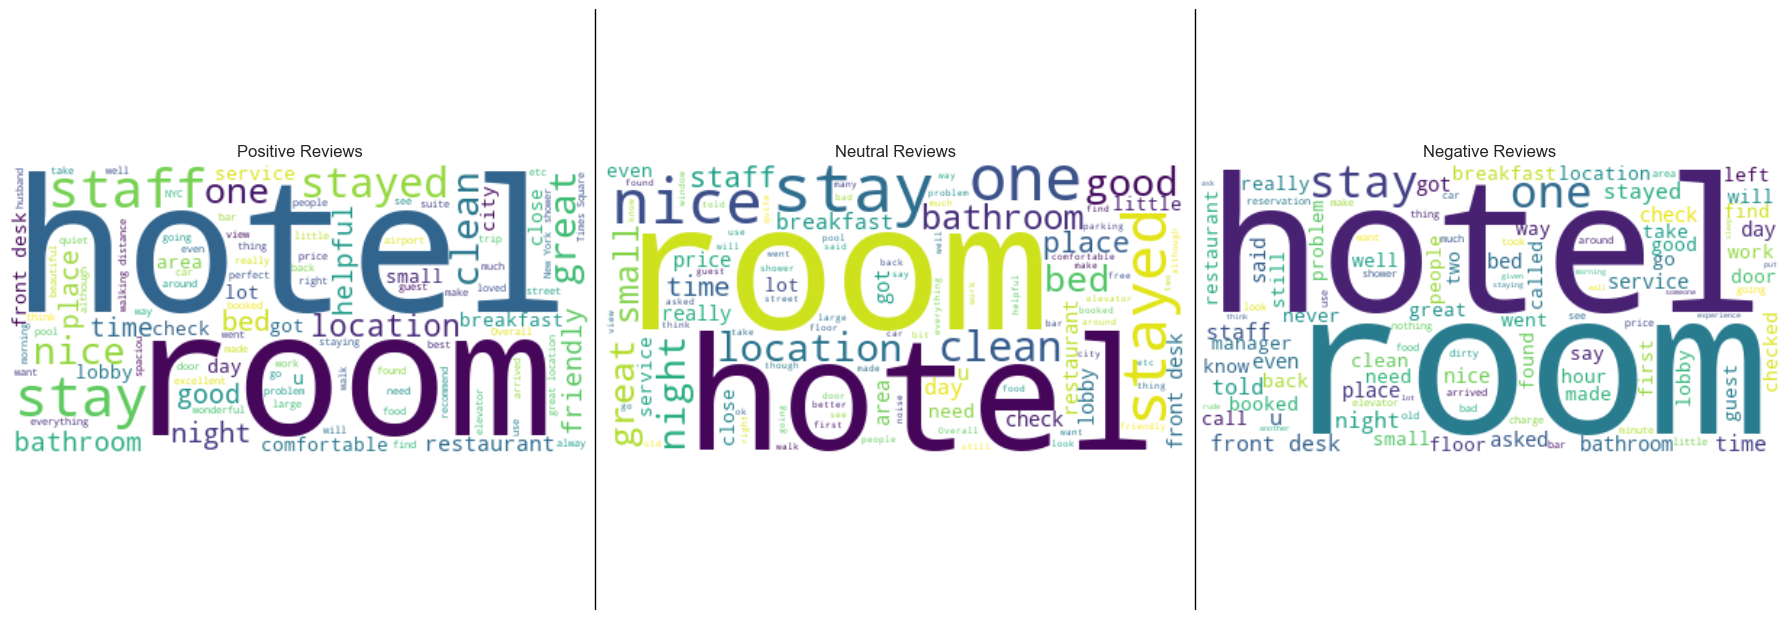

In [18]:
# Generate word clouds with vertical lines between plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, sentiment in enumerate(['positive', 'neutral', 'negative']):
    text = " ".join(customer_reviews_data[customer_reviews_data['sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(
        background_color='white',
        max_words=100
    ).generate(text)

    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f"{sentiment.capitalize()} Reviews")
    axes[i].axis('off')

# Draw vertical lines between subplots
for i in range(1, 3):
    fig.lines.append(plt.Line2D(
        [i / 3, i / 3], [0, 1], color='black', linewidth=1, transform=fig.transFigure
    ))

plt.tight_layout()
plt.show()

## Step 7: Display Sentiment Counts per Topic

In [19]:
# Create a prediction function which can then be served through an API
def predict_sentiment(text):
    try:
        # Clean and vectorize text
        cleaned_text = clean_text(text)
        text_vector = tfidf.transform([cleaned_text])

        # Predict and get confidence
        pred = best_model.predict(text_vector)[0]
        proba = best_model.predict_proba(text_vector).max()

        return pred, round(proba, 3)
    except Exception as e:
        print(f"Prediction error: {str(e)}")
        return None, 0.0

In [20]:
# `tqdm` is a Python library that provides fast, extensible progress bars for
# loops and iterable processing. It visually tracks the progress of tasks in
# the terminal or Jupyter notebooks, making it easier to monitor long-running
# operations such as data processing or model predictions.
import tqdm

# Apply prediction to each review and store results
preds = []
probas = []

for text in tqdm.tqdm(customer_reviews_data['text'], desc="Predicting sentiment"):
    pred, proba = predict_sentiment(text)
    preds.append(pred)
    probas.append(proba)

customer_reviews_data['predicted_sentiment'] = preds
customer_reviews_data['prediction_confidence'] = probas

# Preview the updated DataFrame
display(customer_reviews_data[['text', 'predicted_sentiment', 'prediction_confidence']].head())

Predicting sentiment: 100%|██████████| 44007/44007 [01:59<00:00, 369.30it/s]


,text,predicted_sentiment,prediction_confidence
0,"Being from a small town in Tennessee, I was ve...",positive,0.996
1,I stayed at this courtyard for 2 nights . Ever...,positive,0.992
2,Even in Boston for $180 plus taxes per night y...,positive,0.743
3,This hotel is a great old building (formerly t...,positive,0.405
4,"The Good~room was larger than expected, free i...",negative,0.785


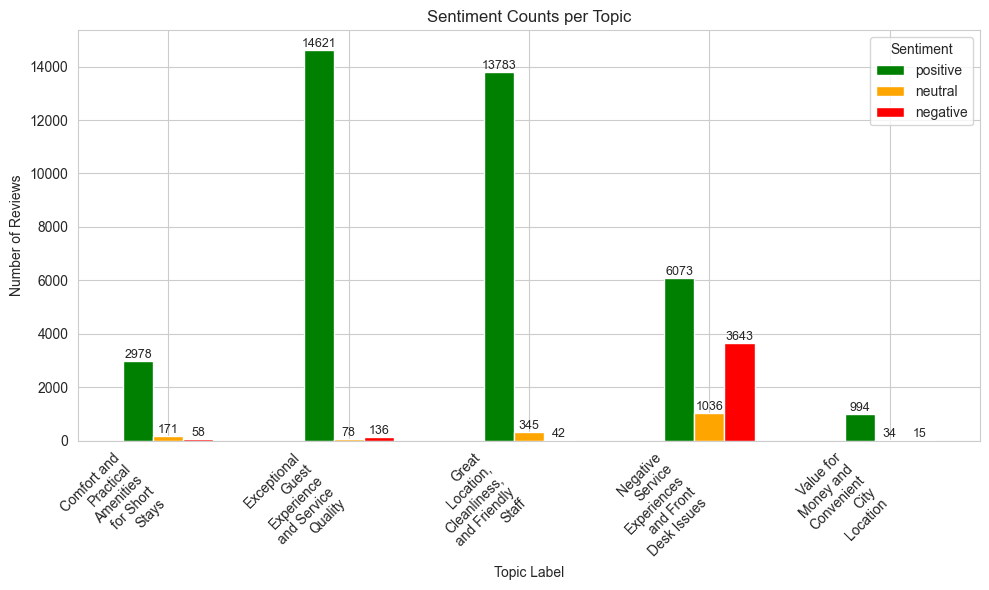

In [21]:
# Function to wrap text
def wrap_labels(labels, width):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Count sentiments per topic_label
sentiment_counts = customer_reviews_data.groupby(['topic_label', 'predicted_sentiment']).size().unstack(fill_value=0)

# Define custom colors for each sentiment
sentiment_colors = {
    'positive': 'green',
    'neutral': 'orange',
    'negative': 'red'
}
sentiment_order = ['positive', 'neutral', 'negative']
colors = [sentiment_colors[s] for s in sentiment_order if s in sentiment_counts.columns]

# Wrap x labels
wrapped_labels = wrap_labels(sentiment_counts.index.astype(str), width=12)

# Plot
ax = sentiment_counts[sentiment_order].plot(kind='bar', stacked=False, figsize=(10,6), color=colors)
ax.set_xticklabels(wrapped_labels, rotation=45, ha='right')
plt.title('Sentiment Counts per Topic')
plt.xlabel('Topic Label')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.tight_layout()

# Add count labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

plt.show()

## Step 8: Export the Results

In [22]:
# Save the results as a CSV file for further analysis and reporting
output_path = "./data/processed_scaled_down_reviews_with_topics_and_sentiments.csv"
# Ensure the data directory exists
if not os.path.exists('./data'):
    os.makedirs('./data')
# Save the CSV file regardless of environment
customer_reviews_data.to_csv(output_path, index=False)
print(f"\n✅ Topic Modeling and Sentiment Results saved to {output_path}")

# Provide a download link if running in Google Colab
try:
    from google.colab import files
    files.download(output_path)
except ImportError:
    print("❌ Not running in Google Colab, skipped dataset download link.")

# Save the trained sentiment classifier
model_path = './model/sentiment_classifier.pkl'
# Ensure the model directory exists
if not os.path.exists('./model'):
    os.makedirs('./model')
# Save the model regardless of environment
joblib.dump(best_model, model_path)
print(f"✅ Model saved to {model_path}")

# Provide a download link if running in Google Colab
try:
    from google.colab import files
    files.download(model_path)
except ImportError:
    print("❌ Not running in Google Colab, skipped model download link.")

# Save the used vectorizer model
vectorizer_path = './model/topic_vectorizer_using_tfidf.pkl'
# Ensure the model directory exists
if not os.path.exists('./model'):
    os.makedirs('./model')
# Save the model regardless of environment
joblib.dump(tfidf, vectorizer_path)
print(f"✅ Vectorizer saved to {vectorizer_path}")

# Provide a download link if running in Google Colab
try:
    from google.colab import files
    files.download(vectorizer_path)
except ImportError:
    print("❌ Not running in Google Colab, skipped vectorizer download link.")

# # Save the topic label
# label_path = './model/topic_labels.json'
# # Ensure the model directory exists
# if not os.path.exists('./model'):
#     os.makedirs('./model')
# # Save the topic labels regardless of environment
# with open(label_path, 'w', encoding='utf-8') as f:
#     json.dump(topic_labels, f, ensure_ascii=False, indent=2)
# print(f"✅ Topic labels saved to {label_path}")
#
# # Provide a download link if running in Google Colab
# try:
#     from google.colab import files
#     files.download(label_path)
# except ImportError:
#     print("❌ Not running in Google Colab, skipped topic label download link.")


✅ Topic Modeling and Sentiment Results saved to ./data/processed_scaled_down_reviews_with_topics_and_sentiments.csv
❌ Not running in Google Colab, skipped dataset download link.
✅ Model saved to ./model/sentiment_classifier.pkl
❌ Not running in Google Colab, skipped model download link.
✅ Vectorizer saved to ./model/topic_vectorizer_using_tfidf.pkl
❌ Not running in Google Colab, skipped vectorizer download link.


## Step 9: Model Deployment

In [23]:
import re
import joblib
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Load persisted artifacts
best_model = joblib.load('./model/sentiment_classifier.pkl')
tfidf = joblib.load('./model/topic_vectorizer_using_tfidf.pkl')

# Initialize NLP tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    # Lowercase conversion
    text = text.lower()

    # Remove special characters/numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize and remove stopwords
    tokens = nltk.word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]

    # Apply stemming
    stemmed = [stemmer.stem(word) for word in filtered]

    return " ".join(stemmed)

def predict_sentiment(text):
    try:
        # Clean and vectorize text
        cleaned_text = clean_text(text)
        text_vector = tfidf.transform([cleaned_text])

        # Predict and get confidence
        pred = best_model.predict(text_vector)[0]
        proba = best_model.predict_proba(text_vector).max()

        return pred, round(proba, 3)
    except Exception as e:
        print(f"Prediction error: {str(e)}")
        return None, 0.0

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Test Prediction Function

In [24]:
# Test prediction

sample_text = "The room was clean and the staff were polite."
# sample_text = "The room was okay and the staff were average."
# sample_text = "The room was dirty and the staff were rude."
# sample_text = "Chumba kilikuwa kichafu na wafanyakazi walikuwa wakorofi."

prediction, confidence = predict_sentiment(sample_text)
print(f"\nPrediction Example:")
print(f"Text: '{sample_text}'")
print(f"Sentiment: {prediction} (Confidence: {confidence:.1%})")


Prediction Example:
Text: 'The room was clean and the staff were polite.'
Sentiment: positive (Confidence: 89.9%)


# References
Alam, H., Ryu, W.-J., & Lee, S. (2016). Joint multi-grain topic sentiment: modeling semantic aspects for online reviews. Information Sciences, 339, 206-223. https://doi.org/10.1016/j.ins.2016.01.013